### Analisis descriptivo

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar solo las primeras 10,000 filas para exploración
master_sample = pd.read_csv(
    '../data/processed/master_dataset.csv',
    nrows=10000  # Solo primeras 10K filas
)

# Ver qué columnas hay
print(master_sample.columns.tolist())
print(master_sample.dtypes)
print(master_sample.head())
master_sample.head()

['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif', 'caudef', 'asist', 'ocur', 'cerdef', 'año', 'escodif', 'pnadif', 'predif', 'puedif', 'ciuodif', 'caudef.descrip', 'tipo', 'tipar', 'clapar', 'semges', 'edadm', 'deprem', 'muprem', 'gretnm', 'escivm', 'naciom', 'ocupam', 'asisrec', 'sitioocu', 'tohite', 'tohinm', 'tohivi', 'viapar', 'escolam', 'paisrem', 'pueblopm', 'ciuomad', 'nacionm', 'anoreg', 'anoocu', 'edadhom', 'edadmuj', 'gethom', 'getmuj', 'nachom', 'nacmuj', 'ocuhom', 'ocumuj', 'mever', 'anover', 'grethom', 'gretmuj', 'escohom', 'escomuj', 'ocupahom', 'ocupamuj', 'eschom', 'escmuj', 'puehom', 'puemuj', 'ciuohom', 'ciuomuj', 'pperhom', 'ppermuj', 'clauni', 'nuphon', 'nupmuj', 'areagocu', 'nunuho', 'nunumu', 'libras', 'onzas', 'edadp', 'deprep', 'muprep', 'gretnp', 'escivp', 'depnap', 'mupnap', 'naciop', 'ocupap', 'depnam', 

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,areag,sexo,diaocu,mesocu,...,escolap,grupetma,paisrep,paisnacp,paisnacm,munnam,pueblopp,ciuopad,munpnap,tipoins
0,5.0,505.0,1.0,9.0,5.0,505,9.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,101.0,9.0,9.0,1.0,101,9.0,1.0,27.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.0,2206.0,9.0,9.0,22.0,2206,9.0,2.0,23.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,201.0,12.0,9.0,2.0,201,9.0,1.0,5.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,101.0,5.0,9.0,1.0,101,9.0,2.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cargando dataset completo...


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\2751100702.py:3: DtypeWarning: Columns (0: mupocu, 1: mnadif, 2: caudef, 3: ciuodif, 4: caudef.descrip, 5: ciuomad, 6: ciuohom, 7: ciuomuj, 8: ciuopad) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('../data/processed/master_dataset.csv')


Shape: (7542836, 109)

Calculando % nulls por tipo de evento...
          defunciones  defunciones_fetales   divorcios  matrimonios  \
depreg            0.0                  0.0    0.000000          0.0   
mupreg            0.0                  0.0    0.000000          0.0   
mesreg            0.0                  0.0    0.000000          0.0   
añoreg            0.0                  0.0    3.638169          0.0   
depocu            0.0                  0.0    0.000000          0.0   
...               ...                  ...         ...          ...   
munnam          100.0                100.0  100.000000        100.0   
pueblopp        100.0                100.0  100.000000        100.0   
ciuopad         100.0                100.0  100.000000        100.0   
munpnap         100.0                100.0  100.000000        100.0   
tipoins         100.0                100.0  100.000000        100.0   

          nacimientos  
depreg       0.000000  
mupreg       0.000000  
mesreg     

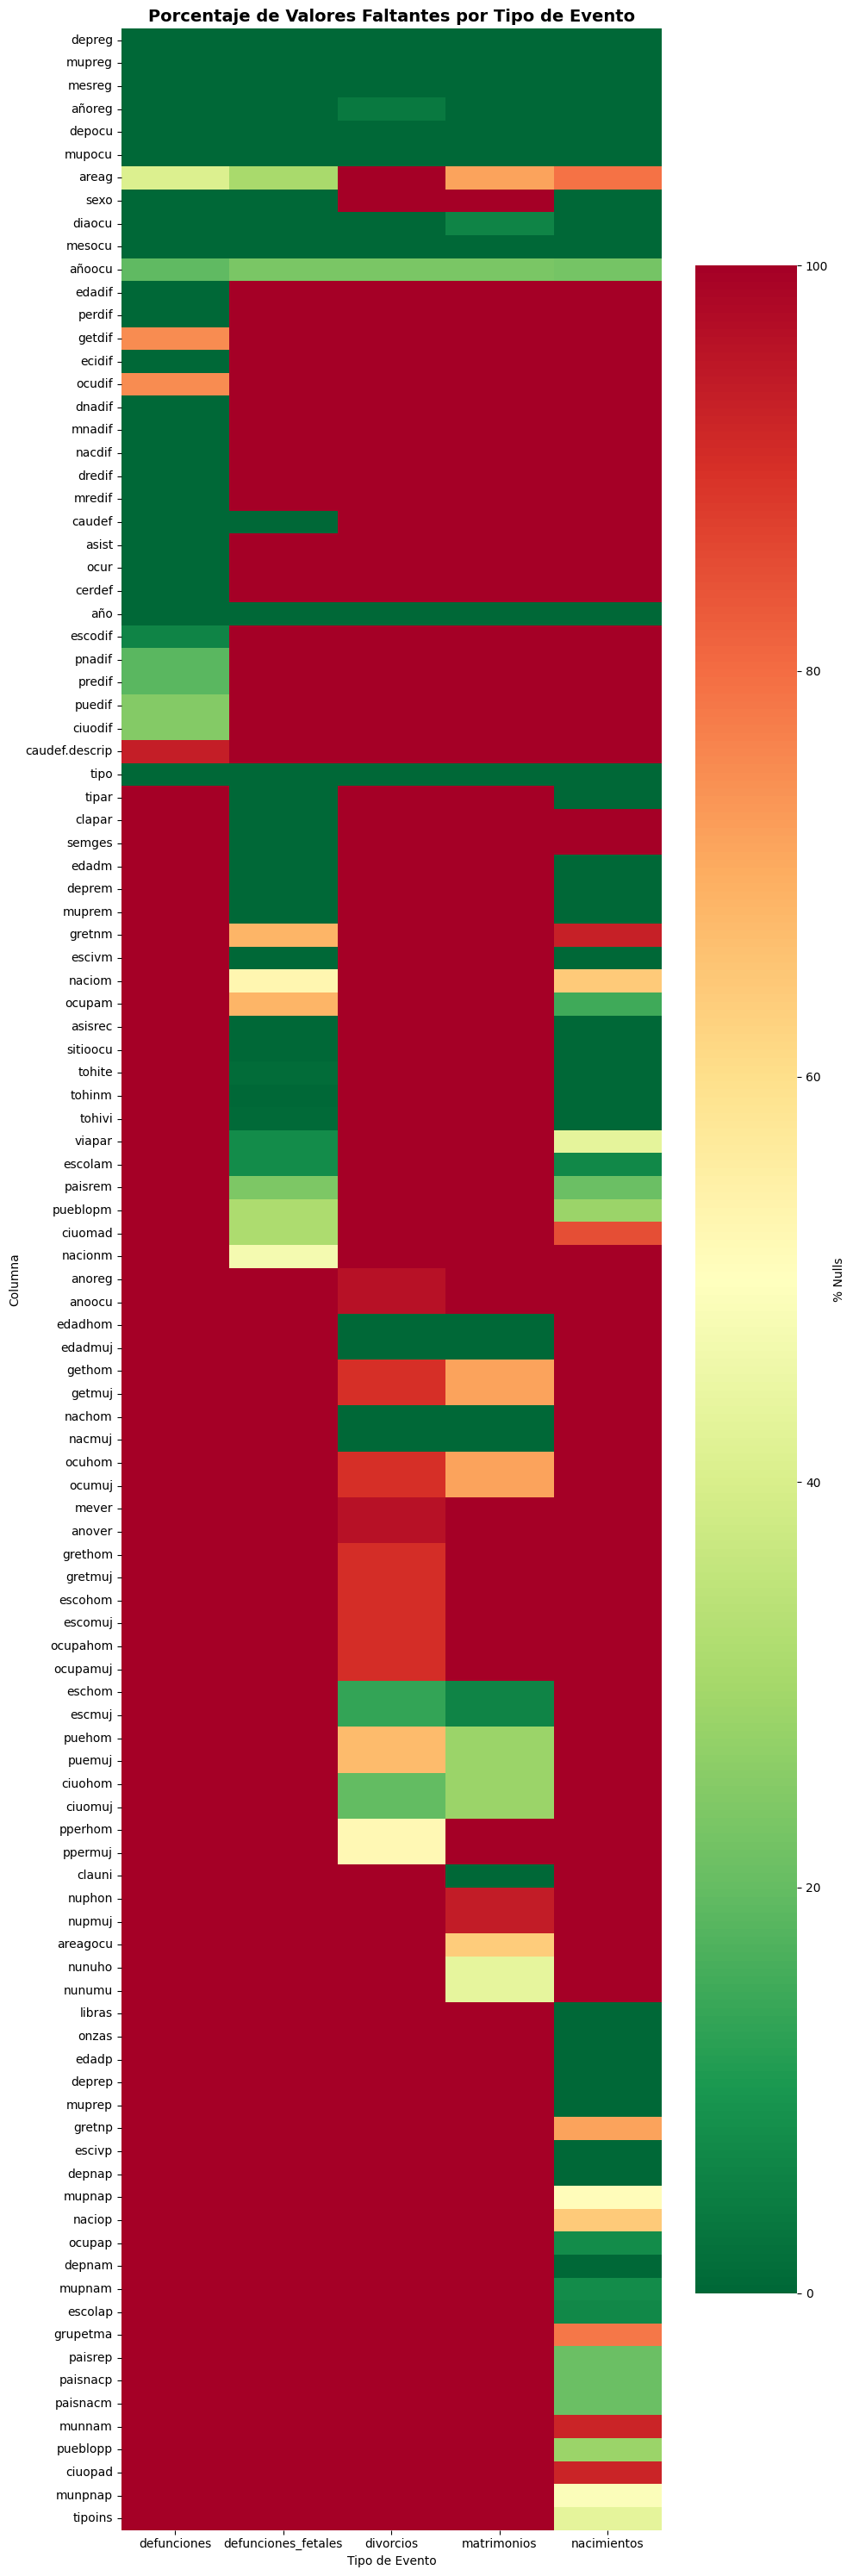

In [2]:

# Cargar dataset completo (todo tipo de evento)
print("Cargando dataset completo...")
df_full = pd.read_csv('../data/processed/master_dataset.csv')
print(f"Shape: {df_full.shape}")

# Calcular porcentaje de nulls por tipo de evento y columna
print("\nCalculando % nulls por tipo de evento...")
tipos_evento = df_full['tipo'].unique()

null_matrix = []
for tipo in sorted(tipos_evento):
    df_tipo = df_full[df_full['tipo'] == tipo]
    null_pct = (df_tipo.isna().sum() / len(df_tipo)) * 100
    null_matrix.append(null_pct)

null_df = pd.DataFrame(null_matrix, index=sorted(tipos_evento)).T
print(null_df)

# Visualizar heatmap
fig, ax = plt.subplots(figsize=(10, 30))
sns.heatmap(null_df, annot=False, cmap='RdYlGn_r', cbar_kws={'label': '% Nulls'}, ax=ax)
ax.set_title('Porcentaje de Valores Faltantes por Tipo de Evento', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Evento')
ax.set_ylabel('Columna')
plt.tight_layout()

# Exportar figura
fig_path = '../output/figures/01_heatmap_nulls_por_tipo.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"\n  Figura guardada: {fig_path}")

# Tabla resumen: % nulls general por columna
null_general = (df_full.isna().sum() / len(df_full)) * 100
null_summary = pd.DataFrame({
    'columna': null_general.index,
    'pct_null_general': null_general.values
}).sort_values('pct_null_general', ascending=False)

print("\nResumen: Columnas con más valores faltantes")
print(null_summary.head(20))

# Guardar resumen
null_summary.to_csv('../output/tables/01_resumen_nulls.csv', index=False)
print(f"\n  Resumen guardado: output/tables/01_resumen_nulls.csv")


In [3]:
# Tarea 1.6: Análisis de Duplicados

print("="*80)
print("TAREA 1.6: ANÁLISIS DE DUPLICADOS")
print("="*80)

# 1. DUPLICADOS COMPLETOS (todas las columnas iguales)
print("\n1. DUPLICADOS COMPLETOS (todas las columnas idénticas)")
print("-" * 80)

duplicados_totales = df_full.duplicated().sum()
porcentaje_duplicados = (duplicados_totales / len(df_full)) * 100

print(f"Total de filas duplicadas: {duplicados_totales:,}")
print(f"Porcentaje del dataset: {porcentaje_duplicados:.4f}%")

if duplicados_totales > 0:
    filas_duplicadas = df_full[df_full.duplicated(keep=False)]
    print(f"Filas involucradas (primeras y repetidas): {len(filas_duplicadas):,}")
else:
    print("  No hay duplicados completos")

# 2. DUPLICADOS POR CLAVE (tipo, año, depreg, mupreg)
print("\n2. DUPLICADOS POR CLAVE (tipo + año + depreg + mupreg)")
print("-" * 80)

columnas_clave = ['tipo', 'año', 'depreg', 'mupreg']
duplicados_clave = df_full.duplicated(subset=columnas_clave).sum()
porcentaje_clave = (duplicados_clave / len(df_full)) * 100

print(f"Total de filas duplicadas por clave: {duplicados_clave:,}")
print(f"Porcentaje del dataset: {porcentaje_clave:.4f}%")

# 3. DUPLICADOS POR TIPO DE EVENTO
print("\n3. DUPLICADOS POR TIPO DE EVENTO")
print("-" * 80)

duplicados_por_tipo = df_full.groupby('tipo').apply(lambda x: x.duplicated().sum())
print(duplicados_por_tipo)

print("\nDuplicados por clave, por tipo:")
duplicados_clave_por_tipo = df_full.groupby('tipo').apply(lambda x: x.duplicated(subset=['año', 'depreg', 'mupreg']).sum())
print(duplicados_clave_por_tipo)

# 4. CREAR TABLA RESUMEN
print("\n4. TABLA RESUMEN DE DUPLICADOS")
print("-" * 80)

resumen_duplicados = []
for tipo in sorted(df_full['tipo'].unique()):
    df_tipo = df_full[df_full['tipo'] == tipo]
    dup_totales = df_tipo.duplicated().sum()
    dup_clave = df_tipo.duplicated(subset=['año', 'depreg', 'mupreg']).sum()
    
    resumen_duplicados.append({
        'tipo_evento': tipo,
        'total_registros': len(df_tipo),
        'duplicados_completos': dup_totales,
        'pct_duplicados_completos': round(100 * dup_totales / len(df_tipo), 4),
        'duplicados_por_clave': dup_clave,
        'pct_duplicados_clave': round(100 * dup_clave / len(df_tipo), 4)
    })

resumen_df = pd.DataFrame(resumen_duplicados)
print(resumen_df.to_string(index=False))

# Añadir fila de total
total_row = {
    'tipo_evento': 'TOTAL',
    'total_registros': len(df_full),
    'duplicados_completos': duplicados_totales,
    'pct_duplicados_completos': round(porcentaje_duplicados, 4),
    'duplicados_por_clave': duplicados_clave,
    'pct_duplicados_clave': round(porcentaje_clave, 4)
}
resumen_df = pd.concat([resumen_df, pd.DataFrame([total_row])], ignore_index=True)

# 5. EXPORTAR RESUMEN
resumen_df.to_csv('../output/tables/02_resumen_duplicados.csv', index=False)
print(f"\n  Resumen guardado: output/tables/02_resumen_duplicados.csv")

# 6. CONCLUSIÓN
print("\n" + "="*80)
print("CONCLUSIÓN:")
print("="*80)
if duplicados_totales == 0:
    print("[OK] No hay registros completamente duplicados en el dataset maestro")
else:
    print(f"[ADVERTENCIA] Se encontraron {duplicados_totales:,} registros duplicados")
    print("Decisión: Mantener en master_dataset.csv (no eliminar)")

print("="*80)


TAREA 1.6: ANÁLISIS DE DUPLICADOS

1. DUPLICADOS COMPLETOS (todas las columnas idénticas)
--------------------------------------------------------------------------------
Total de filas duplicadas: 6,736
Porcentaje del dataset: 0.0893%
Filas involucradas (primeras y repetidas): 12,915

2. DUPLICADOS POR CLAVE (tipo + año + depreg + mupreg)
--------------------------------------------------------------------------------
Total de filas duplicadas por clave: 7,521,407
Porcentaje del dataset: 99.7159%

3. DUPLICADOS POR TIPO DE EVENTO
--------------------------------------------------------------------------------
tipo
defunciones             650
defunciones_fetales     268
divorcios               580
matrimonios            1766
nacimientos            3472
dtype: int64

Duplicados por clave, por tipo:
tipo
defunciones            1162878
defunciones_fetales      38440
divorcios                78505
matrimonios            1051119
nacimientos            5190465
dtype: int64

4. TABLA RESUMEN 

In [4]:
# TAREA 1.7: ESTADÍSTICAS DESCRIPTIVAS

print("="*80)
print("TAREA 1.7: ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)

# 1. Identificar columnas numéricas
columnas_numericas = df_full.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColumnas numéricas: {len(columnas_numericas)}")
print(columnas_numericas)

# 2. ESTADÍSTICAS GENERALES (usando describe que ya incluye std)
print("\n2. ESTADÍSTICAS GENERALES")
print("-" * 80)

stats_generales = df_full[columnas_numericas].describe().T
print(stats_generales)

# Exportar estadísticas generales
stats_generales.to_csv('../output/tables/03_estadisticas_descriptivas.csv')
print(f"\n  Exportado: output/tables/03_estadisticas_descriptivas.csv")

# 3. ESTADÍSTICAS POR TIPO DE EVENTO
print("\n3. ESTADÍSTICAS POR TIPO DE EVENTO")
print("-" * 80)

stats_por_tipo = {}
for tipo in sorted(df_full['tipo'].unique()):
    print(f"\n{tipo.upper()}:")
    df_tipo = df_full[df_full['tipo'] == tipo]
    stats = df_tipo[columnas_numericas].describe().T
    stats_por_tipo[tipo] = stats
    print(stats)

# Crear tabla consolidada (un resumen por tipo)
print("\n4. RESUMEN CONSOLIDADO POR TIPO")
print("-" * 80)

resumen_consolidado = []
for tipo in sorted(df_full['tipo'].unique()):
    df_tipo = df_full[df_full['tipo'] == tipo]
    for col in columnas_numericas:
        valores = df_tipo[col].dropna()
        if len(valores) > 0:
            resumen_consolidado.append({
                'tipo': tipo,
                'columna': col,
                'count': valores.count(),
                'mean': valores.mean(),
                'std': valores.std(),
                'min': valores.min(),
                '25%': valores.quantile(0.25),
                '50%': valores.quantile(0.50),
                '75%': valores.quantile(0.75),
                'max': valores.max()
            })

resumen_df = pd.DataFrame(resumen_consolidado)
print(f"Registros: {len(resumen_df)}")
print(resumen_df.head(10))

# Exportar resumen consolidado
resumen_df.to_csv('../output/tables/03_estadisticas_por_tipo.csv', index=False)
print(f"\n  Exportado: output/tables/03_estadisticas_por_tipo.csv")

TAREA 1.7: ESTADÍSTICAS DESCRIPTIVAS

Columnas numéricas: 99
['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'areag', 'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'getdif', 'ecidif', 'ocudif', 'dnadif', 'nacdif', 'dredif', 'mredif', 'asist', 'ocur', 'cerdef', 'año', 'escodif', 'pnadif', 'predif', 'puedif', 'tipar', 'clapar', 'semges', 'edadm', 'deprem', 'muprem', 'gretnm', 'escivm', 'naciom', 'ocupam', 'asisrec', 'sitioocu', 'tohite', 'tohinm', 'tohivi', 'viapar', 'escolam', 'paisrem', 'pueblopm', 'nacionm', 'anoreg', 'anoocu', 'edadhom', 'edadmuj', 'gethom', 'getmuj', 'nachom', 'nacmuj', 'ocuhom', 'ocumuj', 'mever', 'anover', 'grethom', 'gretmuj', 'escohom', 'escomuj', 'ocupahom', 'ocupamuj', 'eschom', 'escmuj', 'puehom', 'puemuj', 'pperhom', 'ppermuj', 'clauni', 'nuphon', 'nupmuj', 'areagocu', 'nunuho', 'nunumu', 'libras', 'onzas', 'edadp', 'deprep', 'muprep', 'gretnp', 'escivp', 'depnap', 'mupnap', 'naciop', 'ocupap', 'depnam', 'mupnam', 'escolap', 'grupetma', 'paisr

In [5]:
# TAREA 1.8: ANÁLISIS DESCRIPTIVO POR TIPO

print("="*80)
print("TAREA 1.8: ANÁLISIS DESCRIPTIVO POR TIPO")
print("="*80)

def analizar_tipo(tipo, processed_dir, out_tables, out_figs):
    """Genera estadísticas, histogramas y resumen para un tipo de evento"""
    file_path = processed_dir / f"{tipo}_2009_2024.csv"
    
    if not file_path.exists():
        print(f"  {tipo}: archivo no encontrado")
        return []
    
    df = pd.read_csv(file_path)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not num_cols:
        print(f"  {tipo}: sin columnas numéricas")
        return []
    
    print(f"\n{tipo.upper()}: {len(df):,} filas")
    
    # Estadísticas
    stats = df[num_cols].describe().T
    stats.to_csv(out_tables / f"04_stats_{tipo}.csv")
    
    # Histogramas (top 6 variables)
    for var in stats['count'].sort_values(ascending=False).head(6).index:
        serie = df[var].dropna()
        if not serie.empty:
            plt.figure(figsize=(7, 4))
            plt.hist(serie, bins=50, edgecolor='black', alpha=0.7)
            plt.title(f"{tipo} — {var}")
            plt.tight_layout()
            plt.savefig(out_figs / f"02_{tipo}_{var}.png", dpi=150, bbox_inches='tight')
            plt.close()
    
    # Resumen por variable
    resumen = []
    for col in num_cols:
        s = df[col].dropna()
        if not s.empty:
            resumen.append({
                'tipo': tipo,
                'columna': col,
                'count': int(s.count()),
                'mean': round(s.mean(), 4),
                'std': round(s.std(), 4),
                'min': round(s.min(), 4),
                'q25': round(s.quantile(0.25), 4),
                'q50': round(s.quantile(0.5), 4),
                'q75': round(s.quantile(0.75), 4),
                'max': round(s.max(), 4)
            })
    
    return resumen


from pathlib import Path
processed_dir = Path('../data/processed')
out_tables = Path('../output/tables')
out_figs = Path('../output/figures')
out_tables.mkdir(parents=True, exist_ok=True)
out_figs.mkdir(parents=True, exist_ok=True)

tipos = ['defunciones', 'defunciones_fetales', 'divorcios', 'matrimonios', 'nacimientos']
todos_resumenes = []

for tipo in tipos:
    todos_resumenes.extend(analizar_tipo(tipo, processed_dir, out_tables, out_figs))

# Exportar consolidado
if todos_resumenes:
    resumen_df = pd.DataFrame(todos_resumenes)
    resumen_df.to_csv(out_tables / '04_resumen_estadistico_por_tipo.csv', index=False)
    print(f"\n  Resumen: {len(resumen_df)} variables, {len(resumen_df['tipo'].unique())} tipos")

print("\n" + "="*80)

TAREA 1.8: ANÁLISIS DESCRIPTIVO POR TIPO


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\629436611.py:15: DtypeWarning: Columns (0: mnadif, 1: ciuodif, 2: caudef.descrip, 3: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



DEFUNCIONES: 1,167,622 filas


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\629436611.py:15: DtypeWarning: Columns (0: ciuomad, 1: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



DEFUNCIONES_FETALES: 41,638 filas


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\629436611.py:15: DtypeWarning: Columns (0: ciuohom, 1: ciuomuj, 2: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



DIVORCIOS: 82,579 filas


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\629436611.py:15: DtypeWarning: Columns (0: mupocu, 1: ciuohom, 2: ciuomuj, 3: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



MATRIMONIOS: 1,055,861 filas


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\629436611.py:15: DtypeWarning: Columns (0: ciuopad, 1: ciuomad, 2: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



NACIMIENTOS: 5,195,220 filas

  Resumen: 173 variables, 5 tipos



## Tests de Normalidad (Shapiro-Wilk)

In [6]:
from scipy import stats

# Tests de normalidad por tipo
normalidad_resultados = []

for tipo in tipos:
    df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")
    num_cols = df_tipo.select_dtypes(include=[np.number]).columns.tolist()
    
    # Top 6 variables por conteo
    top_vars = df_tipo[num_cols].count().sort_values(ascending=False).head(6).index.tolist()
    
    print(f"\n{tipo.upper()}")
    print("=" * 60)
    
    for var in top_vars:
        serie = df_tipo[var].dropna()
        if len(serie) < 3:
            continue
        
        # Shapiro-Wilk (máximo 5000 muestras)
        muestra = serie.sample(min(5000, len(serie)), random_state=42)
        statistic, p_value = stats.shapiro(muestra)
        
        # Interpretación
        es_normal = "Sí" if p_value > 0.05 else "No"
        print(f"  {var:20} | p-value: {p_value:.4f} | Normal: {es_normal}")
        
        normalidad_resultados.append({
            'tipo': tipo,
            'variable': var,
            'statistic': statistic,
            'p_value': p_value,
            'es_normal': es_normal
        })
        
        # Q-Q plot
        plt.figure(figsize=(8, 6))
        stats.probplot(serie, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot: {tipo} — {var}")
        plt.tight_layout()
        plt.savefig(out_figs / f"qq_{tipo}_{var}.png", dpi=150, bbox_inches='tight')
        plt.close()

# Exportar resultados
normalidad_df = pd.DataFrame(normalidad_resultados)
normalidad_df.to_csv(Path('../output/tables') / '05_tests_normalidad.csv', index=False)
print(f"\n  Tests de normalidad guardados: 05_tests_normalidad.csv")
print(f"  Q-Q plots generados: {len(normalidad_resultados)} gráficos")

C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\570034758.py:7: DtypeWarning: Columns (0: mnadif, 1: ciuodif, 2: caudef.descrip, 3: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



DEFUNCIONES
  depreg               | p-value: 0.0000 | Normal: No
  mupreg               | p-value: 0.0000 | Normal: No
  mesreg               | p-value: 0.0000 | Normal: No
  añoreg               | p-value: 0.0000 | Normal: No
  depocu               | p-value: 0.0000 | Normal: No
  mupocu               | p-value: 0.0000 | Normal: No


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\570034758.py:7: DtypeWarning: Columns (0: ciuomad, 1: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



DEFUNCIONES_FETALES
  depreg               | p-value: 0.0000 | Normal: No
  mupreg               | p-value: 0.0000 | Normal: No
  mesreg               | p-value: 0.0000 | Normal: No
  añoreg               | p-value: 0.0000 | Normal: No
  depocu               | p-value: 0.0000 | Normal: No
  mupocu               | p-value: 0.0000 | Normal: No


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\570034758.py:7: DtypeWarning: Columns (0: ciuohom, 1: ciuomuj, 2: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



DIVORCIOS
  depreg               | p-value: 0.0000 | Normal: No
  mupreg               | p-value: 0.0000 | Normal: No
  mesreg               | p-value: 0.0000 | Normal: No
  diaocu               | p-value: 0.0000 | Normal: No
  mesocu               | p-value: 0.0000 | Normal: No
  depocu               | p-value: 0.0000 | Normal: No


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\570034758.py:7: DtypeWarning: Columns (0: mupocu, 1: ciuohom, 2: ciuomuj, 3: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



MATRIMONIOS
  depreg               | p-value: 0.0000 | Normal: No
  mupreg               | p-value: 0.0000 | Normal: No
  mesreg               | p-value: 0.0000 | Normal: No
  añoreg               | p-value: 0.0000 | Normal: No
  clauni               | p-value: 0.0000 | Normal: No
  edadhom              | p-value: 0.0000 | Normal: No


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\570034758.py:7: DtypeWarning: Columns (0: ciuopad, 1: ciuomad, 2: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



NACIMIENTOS
  depreg               | p-value: 0.0000 | Normal: No
  mupreg               | p-value: 0.0000 | Normal: No
  mesreg               | p-value: 0.0000 | Normal: No
  añoreg               | p-value: 0.0000 | Normal: No
  depocu               | p-value: 0.0000 | Normal: No
  mupocu               | p-value: 0.0000 | Normal: No

  Tests de normalidad guardados: 05_tests_normalidad.csv
  Q-Q plots generados: 30 gráficos


In [7]:
from scipy.stats import skew, kurtosis

print("="*80)
print("ANÁLISIS DE DISTRIBUCIONES - Características Automáticas")
print("="*80)

distribucion_resultados = []

for tipo in tipos:
    df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")
    num_cols = df_tipo.select_dtypes(include=[np.number]).columns.tolist()
    
    top_vars = df_tipo[num_cols].count().sort_values(ascending=False).head(6).index.tolist()
    
    print(f"\n{tipo.upper()}")
    print("-" * 80)
    
    for var in top_vars:
        serie = df_tipo[var].dropna()
        if len(serie) < 3:
            continue
        
        # Calcular características de distribución
        skewness = skew(serie)
        kurt = kurtosis(serie)
        
        # Clasificar distribución
        if abs(skewness) < 0.5:
            simetria = "Simétrica"
        elif skewness > 0.5:
            simetria = "Sesgada derecha"
        else:
            simetria = "Sesgada izquierda"
        
        if kurt < -1:
            tipo_dist = "Platicúrtica (colas ligeras)"
        elif kurt > 1:
            tipo_dist = "Leptocúrtica (colas pesadas)"
        else:
            tipo_dist = "Mesocúrtica (normal-like)"
        
        print(f"  {var:20} | Skewness: {skewness:7.3f} | Kurtosis: {kurt:7.3f} | {simetria}")
        
        distribucion_resultados.append({
            'tipo': tipo,
            'variable': var,
            'skewness': round(skewness, 4),
            'kurtosis': round(kurt, 4),
            'simetria': simetria,
            'tipo_distribucion': tipo_dist
        })

# Exportar análisis de distribuciones
dist_df = pd.DataFrame(distribucion_resultados)
dist_df.to_csv(out_tables / '06_analisis_distribuciones.csv', index=False)
print(f"\n  Análisis de distribuciones guardado: 06_analisis_distribuciones.csv")

# Resumen consolidado por tipo
print("\n" + "="*80)
print("RESUMEN POR TIPO DE EVENTO")
print("="*80)
for tipo in tipos:
    tipo_data = dist_df[dist_df['tipo'] == tipo]
    print(f"\n{tipo.upper()}:")
    for _, row in tipo_data.iterrows():
        print(f"  {row['variable']:20} → {row['simetria']:20} | {row['tipo_distribucion']}")

print("\n" + "="*80)

ANÁLISIS DE DISTRIBUCIONES - Características Automáticas


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\2449338739.py:10: DtypeWarning: Columns (0: mnadif, 1: ciuodif, 2: caudef.descrip, 3: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



DEFUNCIONES
--------------------------------------------------------------------------------
  depreg               | Skewness:   0.332 | Kurtosis:  -1.150 | Simétrica
  mupreg               | Skewness:   0.324 | Kurtosis:  -1.161 | Simétrica
  mesreg               | Skewness:  -0.034 | Kurtosis:  -1.190 | Simétrica
  añoreg               | Skewness:  -3.653 | Kurtosis:  11.347 | Sesgada izquierda
  depocu               | Skewness:   0.338 | Kurtosis:  -1.144 | Simétrica
  mupocu               | Skewness:   0.332 | Kurtosis:  -1.154 | Simétrica

DEFUNCIONES_FETALES
--------------------------------------------------------------------------------
  depreg               | Skewness:   0.161 | Kurtosis:  -1.240 | Simétrica
  mupreg               | Skewness:   0.158 | Kurtosis:  -1.246 | Simétrica
  mesreg               | Skewness:  -0.018 | Kurtosis:  -1.218 | Simétrica
  añoreg               | Skewness:  -3.155 | Kurtosis:   7.958 | Sesgada izquierda
  depocu               | Skewness:   0

C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\2449338739.py:10: DtypeWarning: Columns (0: ciuomad, 1: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")
C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\2449338739.py:10: DtypeWarning: Columns (0: ciuohom, 1: ciuomuj, 2: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



DIVORCIOS
--------------------------------------------------------------------------------
  depreg               | Skewness:   0.581 | Kurtosis:  -1.043 | Sesgada derecha
  mupreg               | Skewness:   0.576 | Kurtosis:  -1.050 | Sesgada derecha
  mesreg               | Skewness:  -0.037 | Kurtosis:  -1.207 | Simétrica
  diaocu               | Skewness:   0.007 | Kurtosis:  -1.191 | Simétrica
  mesocu               | Skewness:   0.021 | Kurtosis:  -1.168 | Simétrica
  depocu               | Skewness:   0.554 | Kurtosis:  -1.064 | Sesgada derecha


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\2449338739.py:10: DtypeWarning: Columns (0: mupocu, 1: ciuohom, 2: ciuomuj, 3: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



MATRIMONIOS
--------------------------------------------------------------------------------
  depreg               | Skewness:   0.115 | Kurtosis:  -1.118 | Simétrica
  mupreg               | Skewness:   0.108 | Kurtosis:  -1.126 | Simétrica
  mesreg               | Skewness:   0.040 | Kurtosis:  -1.285 | Simétrica
  añoreg               | Skewness:  -3.750 | Kurtosis:  12.062 | Sesgada izquierda
  clauni               | Skewness:   3.013 | Kurtosis:  13.160 | Sesgada derecha
  edadhom              | Skewness:  17.879 | Kurtosis: 333.345 | Sesgada derecha


C:\Users\RJBar\AppData\Local\Temp\ipykernel_26580\2449338739.py:10: DtypeWarning: Columns (0: ciuopad, 1: ciuomad, 2: unnamed: 1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipo = pd.read_csv(processed_dir / f"{tipo}_2009_2024.csv")



NACIMIENTOS
--------------------------------------------------------------------------------
  depreg               | Skewness:  -0.105 | Kurtosis:  -1.078 | Simétrica
  mupreg               | Skewness:  -0.030 | Kurtosis:  -1.214 | Simétrica
  mesreg               | Skewness:  -0.028 | Kurtosis:  -1.243 | Simétrica
  añoreg               | Skewness:  -3.442 | Kurtosis:   9.846 | Sesgada izquierda
  depocu               | Skewness:  -0.098 | Kurtosis:  -1.103 | Simétrica
  mupocu               | Skewness:  -0.019 | Kurtosis:  -1.234 | Simétrica

  Análisis de distribuciones guardado: 06_analisis_distribuciones.csv

RESUMEN POR TIPO DE EVENTO

DEFUNCIONES:
  depreg               → Simétrica            | Platicúrtica (colas ligeras)
  mupreg               → Simétrica            | Platicúrtica (colas ligeras)
  mesreg               → Simétrica            | Platicúrtica (colas ligeras)
  añoreg               → Sesgada izquierda    | Leptocúrtica (colas pesadas)
  depocu               → Si

## TAREA 1.b.iii - Tablas de Frecuencia (Variables Categóricas)

In [8]:
print("="*80)
print("TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS")
print("="*80)

# Variables categóricas clave
vars_categoricas = ['tipo', 'año', 'sexo', 'depreg', 'asist', 'mesocu']

# Generar tablas de frecuencia por variable
for var in vars_categoricas:
    if var not in df_full.columns:
        print(f"\n  {var} no existe en el dataset")
        continue
    
    print(f"\n{var.upper()}")
    print("-" * 80)
    
    # Contar frecuencias
    freq = df_full[var].value_counts()
    freq_pct = (freq / len(df_full) * 100).round(2)
    
    # Crear tabla
    tabla_freq = pd.DataFrame({
        'categoría': freq.index,
        'frecuencia': freq.values,
        'porcentaje': freq_pct.values
    }).reset_index(drop=True)
    
    # Mostrar (máx 15 filas)
    print(tabla_freq.head(15).to_string(index=False))
    if len(tabla_freq) > 15:
        print(f"... (+{len(tabla_freq)-15} más)")
    
    # Exportar CSV
    tabla_freq.to_csv(out_tables / f'07_freq_{var}.csv', index=False)
    print(f"  Exportado: 07_freq_{var}.csv")

print("\n" + "="*80)

TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS

TIPO
--------------------------------------------------------------------------------
          categoría  frecuencia  porcentaje
        nacimientos     5195195       68.88
        defunciones     1167602       15.48
        matrimonios     1055847       14.00
          divorcios       82569        1.09
defunciones_fetales       41623        0.55
  Exportado: 07_freq_tipo.csv

AÑO
--------------------------------------------------------------------------------
 categoría  frecuencia  porcentaje
      2021      563246        7.47
      2015      560325        7.43
      2012      553837        7.34
      2013      553617        7.34
      2014      552309        7.32
      2016      551386        7.31
      2018      550260        7.30
      2017      543828        7.21
      2019      540225        7.16
      2022      534405        7.08
      2011      531942        7.05
      2010      514800        6.83
      2020      500980        6.6